In [37]:
# import necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:
# Loading the dataset
data = pd.read_csv('spotify.xls',index_col=[0])

In [3]:
data

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_996,8,0,11,10,1,10,13,13,10,6,...,10,0,8,4,0,7,13,7,2,6
user_997,7,6,9,6,15,6,14,2,9,7,...,15,9,2,2,6,1,0,5,15,11
user_998,6,2,1,5,1,7,2,4,4,0,...,0,13,6,13,0,1,11,13,6,13
user_999,7,0,8,12,6,2,6,2,0,12,...,14,7,12,3,5,15,5,11,9,12


In [4]:
# Non negative Matrix factorization


In [5]:
nmf = NMF(n_components=100,max_iter=1000,random_state=200)

In [6]:
X = data.values

In [7]:
X

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

In [8]:
nmf.fit(X)

C:\Users\intel\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
C:\Users\intel\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


NMF(max_iter=1000, n_components=100, random_state=200)

In [9]:
user_matrix = nmf.transform(X)

In [10]:
user_matrix.shape

(1000, 100)

In [11]:
song_matrix = nmf.components_.T

In [12]:
song_matrix.shape

(5000, 100)

In [13]:
user_matrix

array([[0.03041152, 0.        , 6.03735754, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10450949, 0.        , ..., 0.        , 1.51397869,
        0.        ],
       [0.        , 3.09227919, 0.        , ..., 0.62299824, 0.        ,
        0.        ],
       ...,
       [0.        , 1.26239448, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.11442141, 3.90306648, 0.5963574 , ..., 0.        , 0.51928477,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.32054707, 0.        ,
        0.        ]])

In [14]:
song_matrix

array([[0.29227977, 0.29155378, 0.23095434, ..., 0.02158349, 0.        ,
        0.042259  ],
       [0.2201218 , 0.        , 0.        , ..., 0.        , 0.52120311,
        0.16391248],
       [0.        , 0.16101005, 0.        , ..., 0.22639116, 0.26109955,
        0.14051861],
       ...,
       [0.        , 0.29521502, 0.02888085, ..., 0.31876971, 0.2938576 ,
        0.2803698 ],
       [0.21569302, 0.10762248, 0.04239307, ..., 0.17080385, 0.03336278,
        0.28784931],
       [0.10459146, 0.24942716, 0.12342307, ..., 0.31145263, 0.17757793,
        0.22799469]])

In [15]:
# steps for building recommendation system
#1. Consider reccomending songs to user1 ,user1 located at rows 0
#2 find the eucledean distance between the user1 and the remaining 999 user
# Find the top_n songs by 5 users which are closes to userno.1
# Recoommend all the n songs to user1


In [16]:
# Calucalating the eucledian distance 
def distance(u1,u2):
    return pow(sum([pow(u1[x]-u2[x],2)for x in range(len(u1))]),0.5)

In [17]:
distance(user_matrix[0],user_matrix[1])

16.400235201548536

In [18]:
# calucalting the distance from all the user from the base user

In [19]:
def distance_baseuser(base_user,user_matrix):
    import sys 
    dist = []
    for i in range(len(user_matrix)):
        if base_user != i:
            dist.append(distance(user_matrix[base_user],user_matrix[i]))
        else:
            dist.append(sys.float_info.max)
    return dist

In [20]:
dist_u = distance_baseuser(0,user_matrix)

In [21]:
user_close = np.argsort(dist_u)[0:5]

In [22]:
user_close

array([313, 379, 174, 882, 687], dtype=int64)

In [23]:
# Finding out the songs the closest users are listening to 


In [24]:
for i in user_close:
    print('songs heard by user',i,' are: ')
    temp = pd.DataFrame(data.iloc[i])
    print(temp[temp.values !=0].index)

songs heard by user 313  are: 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_10', 'song_11',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4690)
songs heard by user 379  are: 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_10', 'song_11',
       ...
       'song_4990', 'song_4991', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4674)
songs heard by user 174  are: 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', 

In [25]:
# Reccomending the top 5 songs to user1


In [26]:
def top_5songs(user_close,data):
    temp = data.iloc[user_close]
    dic = temp.max().to_dict()
    sort_dic = sorted(dic.items(),key=lambda keyvalue : (keyvalue[1],keyvalue[0]),reverse=True)[0:5]
    return[x[0] for x in sort_dic]
    
    

In [27]:
top_5songs(user_close,data)

['song_998', 'song_996', 'song_991', 'song_990', 'song_988']

In [28]:
# Using the clustering the Algorithm

In [31]:
mse = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(song_matrix)
    mse[k] = kmeans.inertia_
    
    
    

In [32]:
# plotting elbow curve to check the best value of k

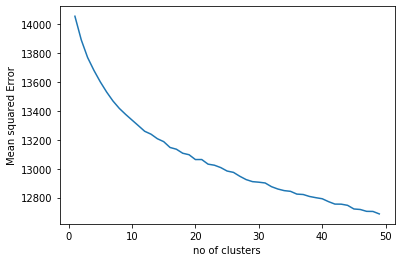

In [35]:
plt.figure()
plt.plot(list(mse.keys()),list(mse.values()))
plt.xlabel('no of clusters')
plt.ylabel('Mean squared Error')
plt.show()

# Note recomending songs to users based on the type of song the user hears(find out the cluster in which the user song is located)
# finding out songs of that cluser heard maximum no of times suggesting them to the user .THIS is the cluster Approach and no based on the clusters of the user

In [38]:
# function for recommeding songs
def reccomend_songs(data,clusters,song_matrix,user_fav_songs,n_recommendation):
    
    # Fitting the Kmeans algorithm
    kmeans = KMeans(n_clusters=clusters,max_iter=1000).fit(song_matrix)
    
    # getting the index value of the users fav song
    
    index_fav_song = data.columns.to_list().index(user_fav_songs)
    
    # no of times the song is heard
    
    song_vector = song_matrix[index_fav_song]
    
    # creating the clusters of the song 
    
    songs_in_cluster = list(kmeans.predict(song_matrix))
    
    # finding the cluster of the fav song and checking the no of times the users favourite song is heard and finding similar songs inside  the cluster

    songs_selected_from_clusters = [x for x in range(len(songs_in_cluster))if songs_in_cluster[x] == kmeans.predict([song_vector])] 
    # collecting all the songs from the song matrix on the basis of clusters which was identiffed
    song_cluster = song_matrix[songs_selected_from_clusters]
    # Finding the nearest songs to the users favourite song 
    recommend = NearestNeighbors(n_neighbors = n_recommendation)
     # identifying the nearest neghbours in our clustes
    recommend.fit(song_cluster)
    
    # picking up the songs to recommend
    recommend_songs = recommend.kneighbors([song_matrix[index_fav_song]])[1]
     # print recoomend songs
    print(recommend_songs)
    
    

In [41]:
reccomend_songs(data,12,song_matrix,'song_10',10)

[[  1 345 104 192 222 198 168 357  88 361]]
